In [1]:
# BiocManager::install("scran")

In [37]:
library(SingleCellExperiment)
library(scran)
library(scater)

In [38]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/covid/full_counts_sce.Rds"

In [39]:
sce = readRDS(filename)
sce

class: SingleCellExperiment 
dim: 45065 141243 
metadata(0):
assays(1): counts
rownames(45065): RP11-34P13.3 FAM138A ... C11orf71.1 LINC01481.1
rowData names(0):
colnames(141243): TCTATTGCACGGTTTA-1-HCATisStab7659969_368C_Madissoon
  CATATGGTCGTCTGAA-1-HCATisStab7646034_367C_Madissoon ...
  CTCGTCAAGTAAGTAC_Donor_02_Reyfman
  TTAGGACCAGCGTTCG-1-HCATisStab7646035_367C_Madissoon
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [40]:
names(colData(sce))

[1] "index"                   "age"                    
 [3] "anatomical_region"       "ann_level_1"            
 [5] "ann_level_2"             "ann_level_3"            
 [7] "ann_level_4"             "ann_level_5"            
 [9] "dataset"                 "donor"                  
[11] "last_author"             "PI"                     
[13] "lung_vs_nasal"           "sample"                 
[15] "sample_last_author_name" "sex"                    
[17] "smoking"                 "total_counts"

In [41]:
# colData(sce)$dataset = unlist(colData(sce)$dataset)
table(colData(sce)$dataset)


   Groningen_Nawijn_2019VieiraBraga   Northwestern_Misharin_2018Reyfman 
                              11110                               41778 
         Sanger_Meyer_2019Madissoon Vanderbilt_Kropski_bioRxivHabermann 
                              56711                               31644 

In [42]:
# colData(sce)$sample = unlist(colData(sce)$sample)
table(sce$sample)


    343B     356C     367C     368C     390C  ARMS026  ARMS032  ARMS038 
    7905    13520    13321     7186    14779     2082     1615     1493 
 ARMS040  ARMS051  ARMS054 Donor_01 Donor_02 Donor_03 Donor_04 Donor_05 
    1005     2876     2039     5436     3858     5235     5191     5341 
Donor_06 Donor_07 Donor_08  THD0001  THD0002  THD0005   VUHD65   VUHD66 
    4300     7516     4901     2218     2647     3494     2552     2802 
  VUHD67   VUHD68   VUHD69   VUHD70   VUHD71 
    7612     5815      800     1509     2195 

In [43]:
# colData(sce)$donor = unlist(colData(sce)$donor)
table(sce$donor)


    343B     356C     367C     368C     390C  ARMS026  ARMS032  ARMS038 
    7905    13520    13321     7186    14779     2082     1615     1493 
 ARMS040  ARMS051  ARMS054 Donor_01 Donor_02 Donor_03 Donor_04 Donor_05 
    1005     2876     2039     5436     3858     5235     5191     5341 
Donor_06 Donor_07 Donor_08  THD0001  THD0002  THD0005   VUHD65   VUHD66 
    4300     7516     4901     2218     2647     3494     2552     2802 
  VUHD67   VUHD68   VUHD69   VUHD70   VUHD71 
    7612     5815      800     1509     2195 

In [9]:
# assay(sce, "logcounts") <- NULL
# sizeFactors(sce) <- NULL

In [ ]:
#############################################
####### Madissoon (full)+ Reyfman (partial) 
#############################################

In [10]:
sce1 = sce[,sce$dataset == 'Sanger_Meyer_2019Madissoon']
sce2 = sce[,sce$dataset == 'Northwestern_Misharin_2018Reyfman']

In [11]:
sce1

class: SingleCellExperiment 
dim: 45065 56711 
metadata(0):
assays(1): counts
rownames(45065): RP11-34P13.3 FAM138A ... C11orf71.1 LINC01481.1
rowData names(0):
colnames(56711): TCTATTGCACGGTTTA-1-HCATisStab7659969_368C_Madissoon
  CATATGGTCGTCTGAA-1-HCATisStab7646034_367C_Madissoon ...
  CCTTACGTCTTAACCT-1-HCATisStab7646033_367C_Madissoon
  TTAGGACCAGCGTTCG-1-HCATisStab7646035_367C_Madissoon
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [12]:
sce2

class: SingleCellExperiment 
dim: 45065 41778 
metadata(0):
assays(1): counts
rownames(45065): RP11-34P13.3 FAM138A ... C11orf71.1 LINC01481.1
rowData names(0):
colnames(41778): AGTAGTCCAGCTGCAC_Donor_05_Reyfman
  AAGTCTGCATACTCTT_Donor_07_Reyfman ...
  ACGCCGAGTGCACCAC_Donor_01_Reyfman CTCGTCAAGTAAGTAC_Donor_02_Reyfman
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

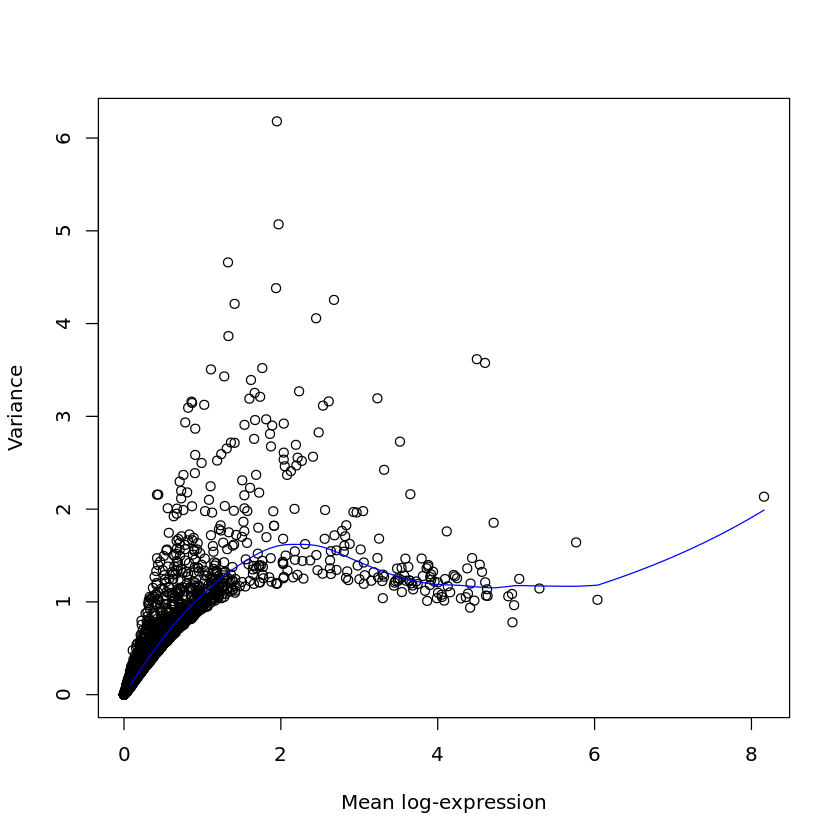

In [13]:
sce = sce1
sce <- scater::logNormCounts(sce)
dec1 <- scran::modelGeneVar(sce)
plot(dec1$mean, dec1$total, xlab="Mean log-expression", ylab="Variance")
curve(metadata(dec1)$trend(x), col="blue", add=TRUE)

In [14]:
sce1 = sce

In [15]:
sce = sce2
sce <- scater::logNormCounts(sce)
dec2 <- scran::modelGeneVar(sce)

In [16]:
dec = dec2
dec = dec[order(dec$mean),]
selected_genes = c(names(head(dec$mean[dec$mean>0.1],1)),
names(head(dec$mean[dec$mean>0.5],1)),
names(head(dec$mean[dec$mean>1],1)),
names(head(dec$mean[dec$mean>1.5],1)),
names(head(dec$mean[dec$mean>2],1)),
names(head(dec$mean[dec$mean>2.5],1)),
names(head(dec$mean[dec$mean>3],1)),
names(head(dec$mean[dec$mean>4],1)),
names(head(dec$mean[dec$mean>5],1)),
names(head(dec$mean[dec$mean>6],1)))
dec2 = dec
selected_genes

[1] "TIPIN"   "MRPS33"  "CNBP"    "PRDX1"   "HLA-A"   "COX4I1"  "S100A11"
 [8] "RPL31"   "RPS28"   "FTH1"

In [17]:
sce = sce[selected_genes,]
sce
assay(sce, "logcounts") <- NULL
sce

class: SingleCellExperiment 
dim: 10 41778 
metadata(0):
assays(2): counts logcounts
rownames(10): TIPIN MRPS33 ... RPS28 FTH1
rowData names(0):
colnames(41778): AGTAGTCCAGCTGCAC_Donor_05_Reyfman
  AAGTCTGCATACTCTT_Donor_07_Reyfman ...
  ACGCCGAGTGCACCAC_Donor_01_Reyfman CTCGTCAAGTAAGTAC_Donor_02_Reyfman
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

class: SingleCellExperiment 
dim: 10 41778 
metadata(0):
assays(1): counts
rownames(10): TIPIN MRPS33 ... RPS28 FTH1
rowData names(0):
colnames(41778): AGTAGTCCAGCTGCAC_Donor_05_Reyfman
  AAGTCTGCATACTCTT_Donor_07_Reyfman ...
  ACGCCGAGTGCACCAC_Donor_01_Reyfman CTCGTCAAGTAAGTAC_Donor_02_Reyfman
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [18]:
sce <- scater::logNormCounts(sce)
rowMeans(logcounts(sce))

TIPIN    MRPS33      CNBP     PRDX1     HLA-A    COX4I1   S100A11     RPL31 
0.1000027 0.5001285 1.0005759 1.5025006 2.0078819 2.5083258 3.0404126 4.0172666 
    RPS28      FTH1 
5.0248028 6.0513304

In [19]:
sce2 = sce

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

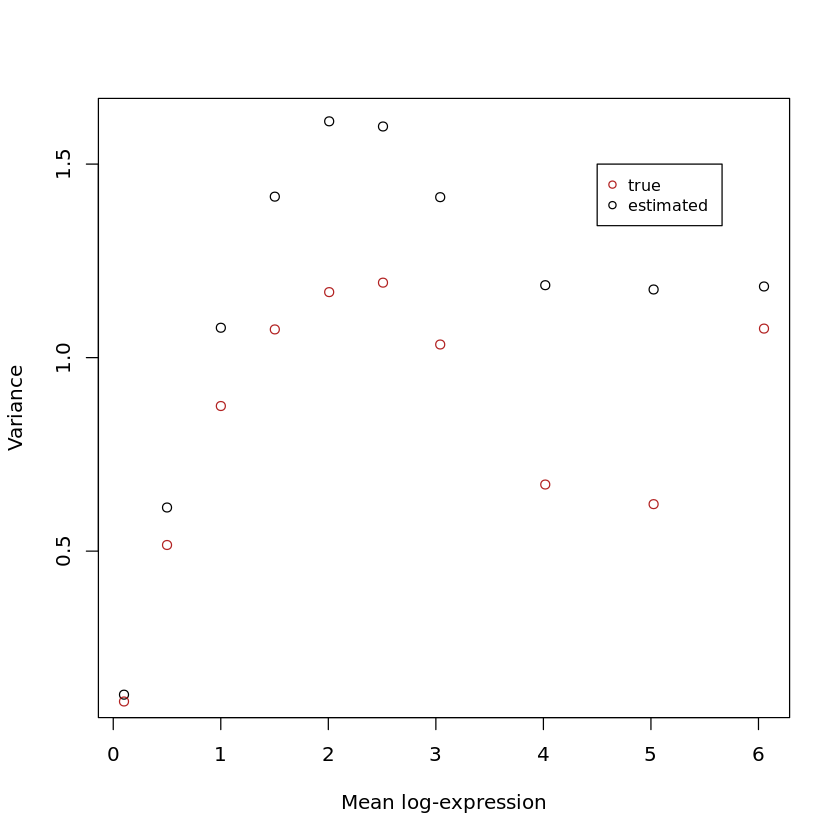

In [35]:
# plot(dec1$mean, metadata(dec1)$trend(dec1$mean))
plot(rowMeans(logcounts(sce2)), metadata(dec1)$trend(rowMeans(logcounts(sce2))), 
     xlab = "Mean log-expression", ylab = "Variance")
dec2 = dec2[selected_genes,]
points(dec2$mean, metadata(dec2)$trend(dec2$mean), add = T, col = "firebrick")
# points(dec1[selected_genes,]$mean, metadata(dec2)$trend(dec1[selected_genes,]$mean), add = T, col = "cornflowerblue")

legend(4.5,1.5, legend=c("true", "estimated"),
       col=c("firebrick", "black"),pch=c(1,1), cex=0.8)#, box.lty=0)

In [ ]:
####################################
###### invert datasets

In [4]:
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/covid/full_counts_sce.Rds"
# sce = readRDS(filename)
sce

class: SingleCellExperiment 
dim: 45065 141243 
metadata(0):
assays(1): counts
rownames(45065): RP11-34P13.3 FAM138A ... C11orf71.1 LINC01481.1
rowData names(0):
colnames(141243): TCTATTGCACGGTTTA-1-HCATisStab7659969_368C_Madissoon
  CATATGGTCGTCTGAA-1-HCATisStab7646034_367C_Madissoon ...
  CTCGTCAAGTAAGTAC_Donor_02_Reyfman
  TTAGGACCAGCGTTCG-1-HCATisStab7646035_367C_Madissoon
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [2]:
table(sce$dataset)


   Groningen_Nawijn_2019VieiraBraga   Northwestern_Misharin_2018Reyfman 
                              11110                               41778 
         Sanger_Meyer_2019Madissoon Vanderbilt_Kropski_bioRxivHabermann 
                              56711                               31644 

In [ ]:
#############################################
####### Reyfman (full)+ Madissoon (partial) 
#############################################

In [5]:
sce1 = sce[,sce$dataset == 'Northwestern_Misharin_2018Reyfman']
sce2 = sce[,sce$dataset == 'Sanger_Meyer_2019Madissoon']

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


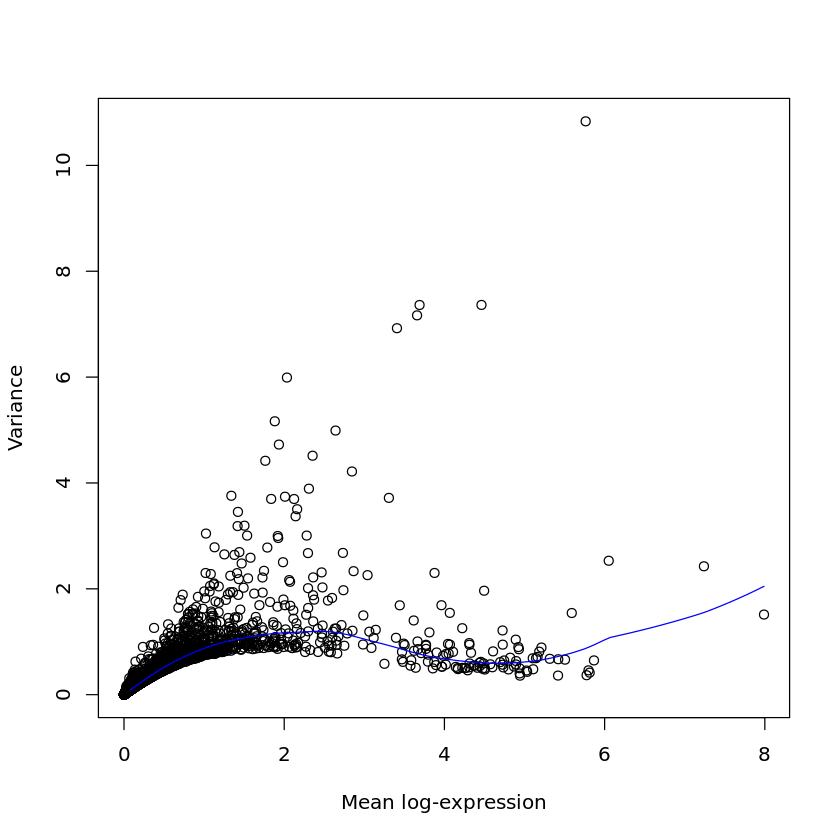

In [6]:
sce = sce1
sce <- scater::logNormCounts(sce)
dec1 <- scran::modelGeneVar(sce)
plot(dec1$mean, dec1$total, xlab="Mean log-expression", ylab="Variance")
curve(metadata(dec1)$trend(x), col="blue", add=TRUE)

In [7]:
sce1 = sce

In [8]:
sce = sce2
sce <- scater::logNormCounts(sce)
dec2 <- scran::modelGeneVar(sce)

In [9]:
dec = dec2
dec = dec[order(dec$mean),]
selected_genes = c(names(head(dec$mean[dec$mean>0.1],1)),
names(head(dec$mean[dec$mean>0.5],1)),
names(head(dec$mean[dec$mean>1],1)),
names(head(dec$mean[dec$mean>1.5],1)),
names(head(dec$mean[dec$mean>2],1)),
names(head(dec$mean[dec$mean>2.5],1)),
names(head(dec$mean[dec$mean>3],1)),
names(head(dec$mean[dec$mean>4],1)),
names(head(dec$mean[dec$mean>5],1)),
names(head(dec$mean[dec$mean>6],1)))
dec2 = dec
selected_genes

[1] "DDX49"  "SLC3A2" "CYCS"   "GSTP1"  "RPS10"  "NACA"   "RPL38"  "RPL18A"
 [9] "RPS27"  "TMSB4X"

In [10]:
sce = sce[selected_genes,]
sce
assay(sce, "logcounts") <- NULL
sce

class: SingleCellExperiment 
dim: 10 56711 
metadata(0):
assays(2): counts logcounts
rownames(10): DDX49 SLC3A2 ... RPS27 TMSB4X
rowData names(0):
colnames(56711): TCTATTGCACGGTTTA-1-HCATisStab7659969_368C_Madissoon
  CATATGGTCGTCTGAA-1-HCATisStab7646034_367C_Madissoon ...
  CCTTACGTCTTAACCT-1-HCATisStab7646033_367C_Madissoon
  TTAGGACCAGCGTTCG-1-HCATisStab7646035_367C_Madissoon
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

class: SingleCellExperiment 
dim: 10 56711 
metadata(0):
assays(1): counts
rownames(10): DDX49 SLC3A2 ... RPS27 TMSB4X
rowData names(0):
colnames(56711): TCTATTGCACGGTTTA-1-HCATisStab7659969_368C_Madissoon
  CATATGGTCGTCTGAA-1-HCATisStab7646034_367C_Madissoon ...
  CCTTACGTCTTAACCT-1-HCATisStab7646033_367C_Madissoon
  TTAGGACCAGCGTTCG-1-HCATisStab7646035_367C_Madissoon
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [11]:
sce <- scater::logNormCounts(sce)
rowMeans(logcounts(sce))

DDX49    SLC3A2      CYCS     GSTP1     RPS10      NACA     RPL38    RPL18A 
0.1000136 0.5008575 1.0009921 1.5037635 2.0242717 2.5319135 3.0023547 4.0018101 
    RPS27    TMSB4X 
5.0394743 6.0367140

In [12]:
sce2 = sce

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

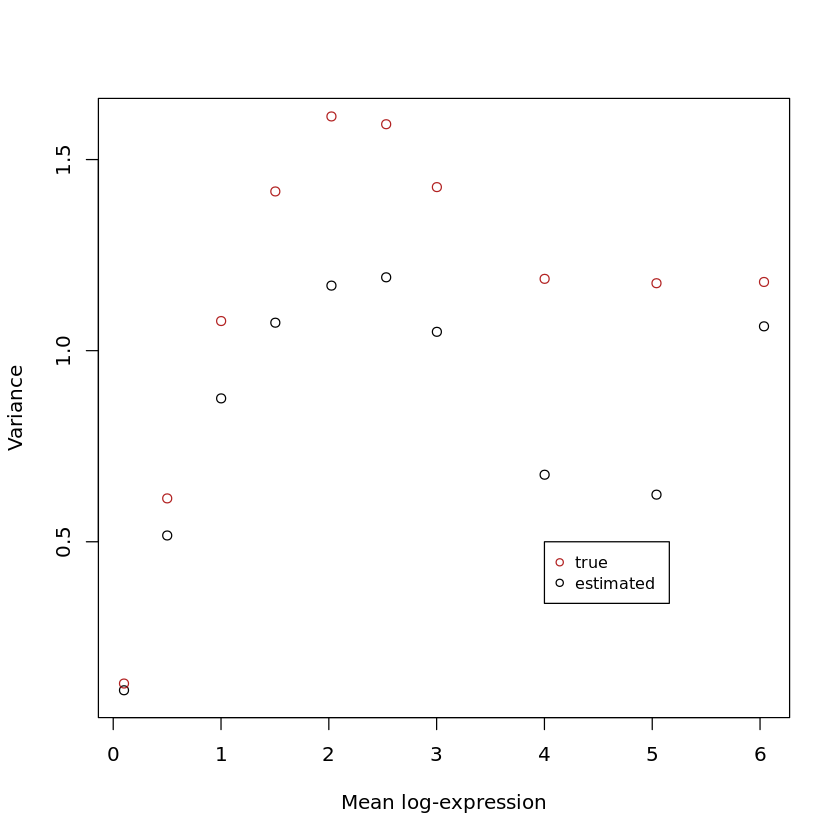

In [13]:
# plot(dec1$mean, metadata(dec1)$trend(dec1$mean))
plot(rowMeans(logcounts(sce2)), metadata(dec1)$trend(rowMeans(logcounts(sce2))),
    xlab="Mean log-expression", ylab="Variance", ylim = c(0.1,1.6))
dec2 = dec2[selected_genes,]
points(dec2$mean, metadata(dec2)$trend(dec2$mean), add = T, col = "firebrick")
# points(dec1[selected_genes,]$mean, metadata(dec2)$trend(dec1[selected_genes,]$mean), add = T, col = "cornflowerblue")

legend(4,0.5, legend=c("true", "estimated"),
       col=c("firebrick", "black"),pch=c(1,1), cex=0.8)

In [ ]:
################################################
################################################
################################################

In [ ]:
################################################
###### look at other two datasets

In [58]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/covid/full_counts_sce.Rds"
sce = readRDS(filename)
sce

class: SingleCellExperiment 
dim: 45065 141243 
metadata(0):
assays(1): counts
rownames(45065): RP11-34P13.3 FAM138A ... C11orf71.1 LINC01481.1
rowData names(0):
colnames(141243): TCTATTGCACGGTTTA-1-HCATisStab7659969_368C_Madissoon
  CATATGGTCGTCTGAA-1-HCATisStab7646034_367C_Madissoon ...
  CTCGTCAAGTAAGTAC_Donor_02_Reyfman
  TTAGGACCAGCGTTCG-1-HCATisStab7646035_367C_Madissoon
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [60]:
names(colData(sce))
names(rowData(sce))

[1] "index"                   "age"                    
 [3] "anatomical_region"       "ann_level_1"            
 [5] "ann_level_2"             "ann_level_3"            
 [7] "ann_level_4"             "ann_level_5"            
 [9] "dataset"                 "donor"                  
[11] "last_author"             "PI"                     
[13] "lung_vs_nasal"           "sample"                 
[15] "sample_last_author_name" "sex"                    
[17] "smoking"                 "total_counts"

character(0)

In [61]:
table(sce$dataset)


   Groningen_Nawijn_2019VieiraBraga   Northwestern_Misharin_2018Reyfman 
                              11110                               41778 
         Sanger_Meyer_2019Madissoon Vanderbilt_Kropski_bioRxivHabermann 
                              56711                               31644 

In [62]:
#############################################
####### Habermann (full)+ VieiraBraga (partial) 
#############################################

In [63]:
sce1 = sce[,sce$dataset == 'Vanderbilt_Kropski_bioRxivHabermann']
sce2 = sce[,sce$dataset == 'Groningen_Nawijn_2019VieiraBraga']

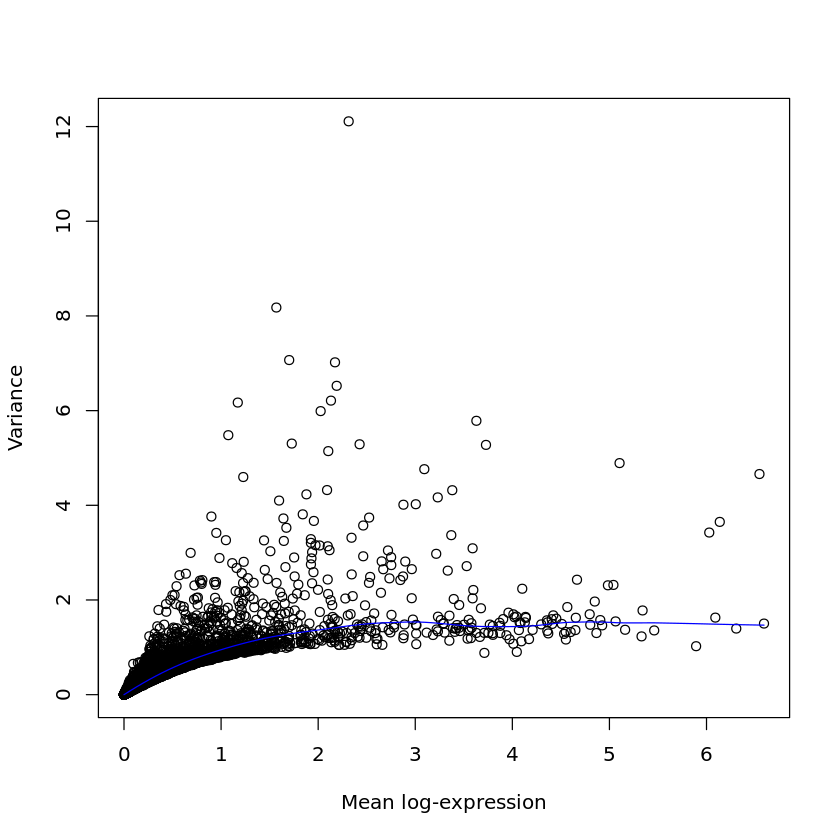

In [64]:
sce = sce1
sce <- scater::logNormCounts(sce)
dec1 <- scran::modelGeneVar(sce)
plot(dec1$mean, dec1$total, xlab="Mean log-expression", ylab="Variance")
curve(metadata(dec1)$trend(x), col="blue", add=TRUE)

In [65]:
sce1 = sce

In [66]:
sce = sce2
sce <- scater::logNormCounts(sce)
dec2 <- scran::modelGeneVar(sce)

In [67]:
dec = dec2
dec = dec[order(dec$mean),]
selected_genes = c(names(head(dec$mean[dec$mean>0.1],1)),
names(head(dec$mean[dec$mean>0.5],1)),
names(head(dec$mean[dec$mean>1],1)),
names(head(dec$mean[dec$mean>1.5],1)),
names(head(dec$mean[dec$mean>2],1)),
names(head(dec$mean[dec$mean>2.5],1)),
names(head(dec$mean[dec$mean>3],1)),
names(head(dec$mean[dec$mean>4],1)),
names(head(dec$mean[dec$mean>5],1)),
names(head(dec$mean[dec$mean>6],1)))
dec2 = dec
selected_genes

[1] "CDK14"  "CNOT2"  "PPP1CA" "MGST3"  "NUCB2"  "HMGN3"  "YBX1"   "RPL37" 
 [9] "RPL15"  "RPL13A"

In [68]:
sce = sce[selected_genes,]
sce
assay(sce, "logcounts") <- NULL
sce

class: SingleCellExperiment 
dim: 10 11110 
metadata(0):
assays(2): counts logcounts
rownames(10): CDK14 CNOT2 ... RPL15 RPL13A
rowData names(0):
colnames(11110): TAGTGGTTCCAAACAC_ARMS026_VieiraBraga
  TACTTACCACGTCTCT_ARMS026_VieiraBraga ...
  CTGATAGAGCGTCAAG_ARMS051_VieiraBraga
  AGGGATGAGATCCGAG_ARMS032_VieiraBraga
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

class: SingleCellExperiment 
dim: 10 11110 
metadata(0):
assays(1): counts
rownames(10): CDK14 CNOT2 ... RPL15 RPL13A
rowData names(0):
colnames(11110): TAGTGGTTCCAAACAC_ARMS026_VieiraBraga
  TACTTACCACGTCTCT_ARMS026_VieiraBraga ...
  CTGATAGAGCGTCAAG_ARMS051_VieiraBraga
  AGGGATGAGATCCGAG_ARMS032_VieiraBraga
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [69]:
sce <- scater::logNormCounts(sce)
rowMeans(logcounts(sce))

CDK14     CNOT2    PPP1CA     MGST3     NUCB2     HMGN3      YBX1     RPL37 
0.1000722 0.5000774 1.0011046 1.5043980 2.0017450 2.5034411 3.0262417 4.0109442 
    RPL15    RPL13A 
5.0170573 6.0008926

In [70]:
sce2 = sce

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

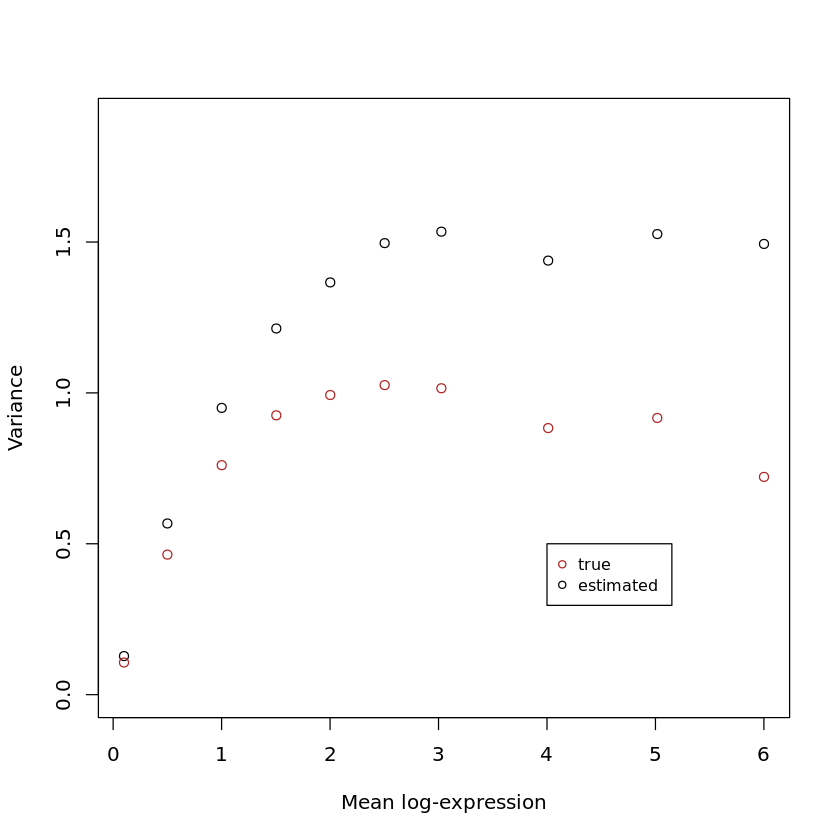

In [71]:
# plot(dec1$mean, metadata(dec1)$trend(dec1$mean))
plot(rowMeans(logcounts(sce2)), metadata(dec1)$trend(rowMeans(logcounts(sce2))),
    xlab="Mean log-expression", ylab="Variance", ylim = c(0,1.9))
dec2 = dec2[selected_genes,]
points(dec2$mean, metadata(dec2)$trend(dec2$mean), add = T, col = "firebrick")
# points(dec1[selected_genes,]$mean, metadata(dec2)$trend(dec1[selected_genes,]$mean), add = T, col = "cornflowerblue")

legend(4,0.5, legend=c("true", "estimated"),
       col=c("firebrick", "black"),pch=c(1,1), cex=0.8)